In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model

In [ ]:
# importing dataset
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [ ]:
from google.colab import files
uploaded1 = files.upload()

Saving test.csv to test (1).csv


# **IMPORTING**

In [ ]:
import io
df_train = pd.read_csv(io.BytesIO(uploaded['train (1).csv']))

In [ ]:
import io
df_test = pd.read_csv(io.BytesIO(uploaded1['test (1).csv']))

In [ ]:
df_train.dtypes

name                      object
duration_ms                int64
explicit                    bool
popularity                 int64
artists                   object
album_name                object
danceability             float64
energy                   float64
key                        int64
loudness                 float64
mode                     float64
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
valence                  float64
tempo                    float64
features_duration_ms       int64
time_signature           float64
n_beats                  float64
n_bars                   float64
popularity_confidence    float64
processing               float64
genre                     object
dtype: object

# **SINGLE (number of y) SIMPLE (number of x) LINEAR (type of model) REGRESSION**

In [1]:
x_train=df_train["danceability"].values.reshape(-1, 1) #https://www.alpharithms.com/wp-content/uploads/1186/reshaping-illustration-rows-vs-columns-1024x576.jpg
y_train=df_train["popularity"].values

x_test=df_test["danceability"].values.reshape(-1, 1)
y_test=df_test["popularity"].values

NameError: ignored

In [ ]:
reg=LinearRegression()
reg.fit(x_train, y_train)

In [ ]:
print("Coefficient: ", reg.coef_)
print("Intercept: ", reg.intercept_)

In [ ]:
sns.scatterplot(data=df_train, x="danceability", y="popularity")
plt.plot(x_train, reg.coef_*x_train+reg.intercept_, c="red")

Il grafico a dispersione o scatterplot non mostra alcuna relazione tra le 2 variabili scelte così come il calcolo della correlazione di Person ci ha suggerito all'inizio restituendoci un valore pari a 0.05 .
Il calcolo della regressione lineare ha però evidenziato una "dipendenza" positiva poiché ad un aumento di 1 unità della variabile "danceability", la "popolarity" aumenta di circa 4.9 .





In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

Questi valori evidenziano l'incapacità predittiva della variabile danceability sulla popularity. La proporzione della varianza della popularity "predetta" è pressoché nulla (R2= 0.004) mentre il numero di errori è molto alto, del resto la retta di regressione "fitta" molto male il training set.


In [ ]:
sns.scatterplot(data=df_test, x="danceability", y="popularity")
plt.plot(x_test, reg.coef_*x_test+reg.intercept_, c="red")

Utilizzare Ridge o Lasso regression nel caso di una simple linear regression non ha senso. Queste vanno bene in contesti di multiple regressions dove le features esplicative sono molteplici.

In [ ]:
#Setting trainset popularity as a %
df_train['popularity'] /= 100
#Setting testset popularity as a %
df_test['popularity'] /= 100


x_train=df_train["danceability"].values.reshape(-1, 1)
y_train=df_train["popularity"].values

x_test=df_test["danceability"].values.reshape(-1, 1)
y_test=df_test["popularity"].values


reg=LinearRegression()
reg.fit(x_train, y_train)


print("Coefficient: ", reg.coef_)
print("Intercept: ", reg.intercept_)


sns.scatterplot(data=df_train, x="danceability", y="popularity")
plt.plot(x_train, reg.coef_*x_train+reg.intercept_, c="red")


y_pred = reg.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))


sns.scatterplot(data=df_test, x="danceability", y="popularity")
plt.plot(x_test, reg.coef_*x_test+reg.intercept_, c="red")

# **SINGLE MULTIPLE LINEAR REGRESSION**

## ***data preparation***

Si è deciso di performare uno studio di regressione multipla per la "popularity" con tutte le variabili quantitative a nostra disposizione.

è necessario pertanto fare un po' di data preparation. In particolare, abbiamo rimosso tutte le variabili non quantitative e popularity_confidence in quanto mancante nell'80% circa dei patterns; e gestito i missing values. Si è deciso di lasciare le variabili ridondanti come "features_duration_ms" con "duration_ms", "n_bars" con "n_beats" e "processing" con "key" per osservare i risultati delle regressioni con regolarizzazione in questo palese caso di multicollinearità.

In [ ]:
column2drop = ['name', 'album_name', 'explicit', 'artists', 'genre', 'popularity_confidence']
df_train.drop(column2drop, axis=1, inplace=True)
df_test.drop(column2drop, axis=1, inplace=True)

In [ ]:
#df_train["popularity"].unique()

In [ ]:
#Dealing with mode attribute missing values train set
#Computing p0 and p1 and filling missing values of mode attribute by sampling
#df['mode'].value_counts().plot(kind='bar', title='mode')
p0=df_train['mode'].value_counts()[0]/(len(df_train)-df_train['mode'].isnull().sum())
p1=df_train['mode'].value_counts()[1]/(len(df_train)-df_train['mode'].isnull().sum())
#print(f'p0={p0} , p1={p1}')
list_of_nan_indexes=df_train[df_train['mode'].isnull()].index.tolist()
for i in list_of_nan_indexes:
    #df.loc[i,'mode']
    #df.loc[['viper', 'sidewinder'], ['shield']] = 50
    if np.random.random() < p1:
        df_train.loc[i,'mode'] = 1.0
    else:
        df_train.loc[i,'mode'] = 0.0

#Dealing with mode attribute missing values test set
#Computing p0 and p1 and filling missing values of mode attribute by sampling
#df['mode'].value_counts().plot(kind='bar', title='mode')
p0=df_test['mode'].value_counts()[0]/(len(df_test)-df_test['mode'].isnull().sum())
p1=df_test['mode'].value_counts()[1]/(len(df_test)-df_test['mode'].isnull().sum())
#print(f'p0={p0} , p1={p1}')
list_of_nan_indexes=df_test[df_test['mode'].isnull()].index.tolist()
for i in list_of_nan_indexes:
    #df.loc[i,'mode']
    #df.loc[['viper', 'sidewinder'], ['shield']] = 50
    if np.random.random() < p1:
        df_test.loc[i,'mode'] = 1.0
    else:
        df_test.loc[i,'mode'] = 0.0

In [ ]:
#Dealing with time_signature attribute missing values - train
#Computing the array containing the probabilities of every outcome for time_signature
outcomes_of_time_signature = len(df_train['time_signature'].value_counts())
p_array=np.array(df_train['time_signature'].value_counts().sort_index(ascending=True)/(len(df_train)-df_train['time_signature'].isnull().sum()))
#creating a dictionary containing the correspondance between value and sorted index
dict_ts = {0: 0.0, 1: 1.0, 2: 3.0, 3 : 4.0, 4 : 5.0}
list_of_nan_indexes_ts=df_train[df_train['time_signature'].isnull()].index.tolist()
from scipy.stats import multinomial
#please forgive the dunb programming here, no real deal of time, only ~3000 points to be evaluated
for i in list_of_nan_indexes_ts:
    tmp = multinomial.rvs(1, p_array, size=1, random_state=None)
    array_tmp=np.where(tmp[0][:]==1)
    index=array_tmp[0][0] #implement a dict for the substitution
    df_train.loc[i,'time_signature'] = dict_ts[index]

#Dealing with time_signature attribute missing values - test
#Computing the array containing the probabilities of every outcome for time_signature
outcomes_of_time_signature = len(df_test['time_signature'].value_counts())
p_array=np.array(df_test['time_signature'].value_counts().sort_index(ascending=True)/(len(df_test)-df_test['time_signature'].isnull().sum()))
#creating a dictionary containing the correspondance between value and sorted index
dict_ts = {0: 0.0, 1: 1.0, 2: 3.0, 3 : 4.0, 4 : 5.0}
list_of_nan_indexes_ts=df_test[df_test['time_signature'].isnull()].index.tolist()
from scipy.stats import multinomial
#please forgive the dunb programming here, no real deal of time, only ~3000 points to be evaluated
for i in list_of_nan_indexes_ts:
    tmp = multinomial.rvs(1, p_array, size=1, random_state=None)
    array_tmp=np.where(tmp[0][:]==1)
    index=array_tmp[0][0] #implement a dict for the substitution
    df_test.loc[i,'time_signature'] = dict_ts[index]

In [ ]:
df_train.isnull().sum()

duration_ms             0
popularity              0
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
features_duration_ms    0
time_signature          0
n_beats                 0
n_bars                  0
processing              0
dtype: int64

In [ ]:
#Changing udm to duration_ms and features_duration_ms from ms to min
df_train['duration_ms'] *= 1/6e4
df_test['duration_ms'] *= 1/6e4

df_train['features_duration_ms'] *= 1/6e4
df_test['features_duration_ms'] *= 1/6e4

In [ ]:
df_train.rename(columns = {'duration_ms':'duration_min'}, inplace = True)
df_train.rename(columns = {'features_duration_ms':'features_duration_min'}, inplace = True)

df_test.rename(columns = {'duration_ms':'duration_min'}, inplace = True)
df_test.rename(columns = {'features_duration_ms':'features_duration_min'}, inplace = True)

'''df_train.rename(columns = {'popularity':'popularity_percent'}, inplace = True)
df_test.rename(columns = {'popularity':'popularity_percent'}, inplace = True)'''

"df_train.rename(columns = {'popularity':'popularity_percent'}, inplace = True)\ndf_test.rename(columns = {'popularity':'popularity_percent'}, inplace = True)"

In [ ]:
df_train["popularity"].unique()

array([46,  0,  3, 23, 25, 32, 27, 64, 45, 21, 19, 22, 51, 57,  1, 14, 53,
       20, 18, 13, 28, 55, 12, 33,  8, 26, 50, 49, 44, 56, 67, 43, 17, 42,
       11,  7, 37, 58,  2,  6, 52, 41, 40, 48, 24, 16, 31, 15, 70,  5,  4,
       34, 29, 30, 60, 35, 38, 39, 63, 61, 59, 71, 10, 65,  9, 47, 36, 81,
       54, 69, 74, 78, 68, 66, 62, 73, 80, 72, 75, 77, 83, 88, 76, 85, 82,
       79, 84, 94])

## ***linear regression analysis***

In [ ]:
#x_of_reg=["duration_min", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "features_duration_min", "time_signature", "n_beats", "n_bars", "processing"]
x_train = df_train[["duration_min", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "features_duration_min", "time_signature", "n_beats", "n_bars", "processing"]].values
y_train = df_train["popularity"].values

x_test = df_test[["duration_min", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "features_duration_min", "time_signature", "n_beats", "n_bars", "processing"]].values
y_test = df_test["popularity"].values

con il reshape() mi dà errore quando fitto.

### *linear regression*

In [ ]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [ 5.36893993e-03  4.14445064e-02 -4.06863759e-02 -5.21932105e-05
 -2.11992369e-04  1.18878977e-02 -2.59830735e-01  2.67803636e-02
 -1.42046971e-01  2.52221851e-02 -1.40343955e-02  4.44420886e-05
 -5.32200725e-03 -8.80343187e-03  1.00324855e-04 -5.11913559e-04
 -1.09098978e-03]
Intercept: 
 0.3702382017997896


In [ ]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.120
MSE: 0.031
MAE: 0.143


Nonostante aver usato tutte le variabili quantitative a nostra disposizione, la percentuale di varianza spiegata della "popularity" è molto bassa, il 12%.

### *ridge regression*

RECALL: ridge regression with alpha = 0 is least squares!


Which alpha we should choose to tune the model?

generation an array of alpha values ranging from very big to very small, essentially covering the full range of scenarios from the null model containing only the intercept, to the least squares fit:

In [ ]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

Associated with each alpha value is a vector of ridge regression coefficients, which we'll store in a matrix coefs. In this case, it is a  18×100
  matrix, with 18 rows (one for each predictor) and 100 columns (one for each value of alpha). Remember that we'll want to standardize the variables so that they are on the same scale.

In [ ]:
from sklearn import preprocessing
df_train_scaled = preprocessing.scale(df_train)
df_test_scaled = preprocessing.scale(df_test)
df_train_scaled=pd.DataFrame(df_train_scaled, columns = df_train.columns)
df_test_scaled=pd.DataFrame(df_test_scaled, columns = df_test.columns)

In [ ]:
x_train = df_train_scaled[["duration_min", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "features_duration_min", "time_signature", "n_beats", "n_bars", "processing"]].values
y_train = df_train_scaled["popularity"].values

x_test = df_test_scaled[["duration_min", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "features_duration_min", "time_signature", "n_beats", "n_bars", "processing"]].values
y_test = df_test_scaled["popularity"].values

In [ ]:
#initialize list to store coefficient values
coefs = []
alphas = range(0,100)

for a in alphas:
    ridge=Ridge(alpha=a)
    ridge.fit(x_train, y_train)
    coefs.append(ridge.coef_)

np.shape(coefs)

(100, 17)

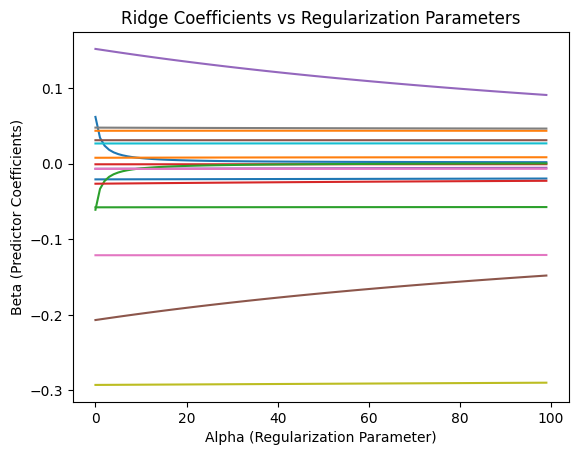

In [ ]:
# Make plot of Beta as a function of Alpha
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(alphas,coefs)
ax.set_xlabel('Alpha (Regularization Parameter)')
ax.set_ylabel('Beta (Predictor Coefficients)')
ax.set_title('Ridge Coefficients vs Regularization Parameters')
ax.axis('tight')
fig.savefig('coef_vs_alpha.png')

even if it's not too much evident, this plot shows the power of the ridge regression: as alpha increases, the coefficients decreases from their original value, or better they shrunk toward zero and each other. This limits the multicollinearity between (variables) predictors.

which alpha to choose so?

we can select the optimal alpha through generalized cross validation.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV

# Selecting lambda
# Fit Ridge regression through cross validation
reg_cv=RidgeCV(alphas=range(1,100))
reg_cv.fit(x_train, y_train)

reg_cv.alpha_

70

In [ ]:
reg_ridge = Ridge(alpha= reg_cv.alpha_)
reg_ridge.fit(x_train, y_train)
print('Coefficients: \n', reg_ridge.coef_)
print('Intercept: \n', reg_ridge.intercept_)

Coefficients: 
 [ 2.00668641e-03  4.33767955e-02 -5.75987260e-02 -9.01952625e-04
 -5.98516376e-03  3.08436935e-02 -1.21030167e-01  4.64869721e-02
 -2.90529566e-01  2.66221676e-02 -2.01528962e-02  8.22332694e-03
 -2.90042375e-04 -2.36727626e-02  1.03722210e-01 -1.60822606e-01
 -7.00458156e-03]
Intercept: 
 2.2258327404907325e-16


As expected, none of the coefficients are exactly zero - ridge regression does not perform variable selection!

In [ ]:
y_pred=reg_ridge.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.120
MSE: 0.880
MAE: 0.770


### *lasso regression*

In [ ]:
from sklearn.linear_model import Lasso, LassoCV

lasso = Lasso(max_iter = 10000)
coef = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x_train, y_train)
    coef.append(lasso.coef_)

np.shape(coef)

<ipython-input-489-bb5f3dbd2c5e>:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(x_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.712e+03, tolerance: 1.500e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


(100, 17)

In [ ]:
lasso_cv=LassoCV(alphas=range(1,100))
lasso_cv.fit(x_train, y_train)

lasso_cv.alpha_

99

In [ ]:
#"0:duration_min", "1:danceability", "2:energy", "3:key", "4:loudness", "5:mode", "6:speechiness", "7:acousticness", "8:instrumentalness", "9:liveness", "10:valence", "11:tempo", "12:features_duration_min", "13:time_signature", "14:n_beats", "15:n_bars", "16:processing"

reg_lasso = Lasso(alpha= 0.01)
reg_lasso.fit(x_train, y_train)
print('Coefficients: \n', reg_lasso.coef_)
print('Intercept: \n', reg_lasso.intercept_)
pd.DataFrame(reg_lasso.coef_)

Coefficients: 
 [-0.          0.01648716 -0.05434391  0.         -0.          0.02088906
 -0.11059334  0.03696535 -0.27680417  0.01297035 -0.         -0.
 -0.         -0.00499515 -0.         -0.04909117 -0.        ]
Intercept: 
 2.4367819569026747e-16


,0
0,-0.000000
1,0.016487
2,-0.054344
3,0.000000
4,-0.000000
5,0.020889
6,-0.110593
7,0.036965
8,-0.276804
9,0.012970


proprietà della regorizzazione di Lasso: feature selection. Nella nostra analisi, con alpha ottimo mediante cross validation, tutte = 0 pertanto tutte le variabili are useless and redundant. Con alpha molto piccolo(=0.01) 9 variabili risultano influenzare la popolarità.

In [ ]:
y_pred_lasso=reg_lasso.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred_lasso))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred_lasso))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred_lasso))

R2: 0.000
MSE: 1.000
MAE: 0.833


## ***non linear regression analysis***

### *decision tree*

In [ ]:
reg_tree = DecisionTreeRegressor()

In [ ]:
reg_tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_tree = reg_tree.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred_tree))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred_tree))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred_tree))

R2: -0.611
MSE: 1.611
MAE: 0.978


### *knn*

In [ ]:
reg_knn = KNeighborsRegressor()

In [ ]:
reg_knn.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred_knn = reg_knn.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred_knn))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred_knn))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred_knn))

R2: 0.097
MSE: 0.903
MAE: 0.748


#**MULTIVARIATE MULTIPLE LINEAR REGRESSION**